In [2]:
import pandas as pd

In [9]:
data=pd.read_csv("table.csv").set_index("label").sort_values(by="pixels")
data["total"] = data["conversionAndWrite"] + data["minimization"] + data["convertBack"] + data["modelCheckingMin"]
data["speedupMC"] = data["modelCheckingFull"] / data["modelCheckingMin"]
#data["speedupIdeal"] = df["modelCheckingFull"]
#data["ideal"] = df["conversion"] + df["convertBack"] + df["modelCheckingMin"] - 0.3


0.4192976942285895

In [10]:
data

,pixels,transitions,statesMin,transitionsMin,conversion,conversionAndWrite,minimization,convertBack,modelCheckingFull,modelCheckingMin,total,speedupMC
label,,,,,,,,,,,,
maze-128,16384,145924,7,21,0.360907,0.407411,0.476413,0.371662,0.449400,0.486944,1.742431,0.922899
rai-130,31200,278584,155,899,0.705713,0.464221,0.478911,0.671564,1.162841,0.523367,2.138062,2.221845
maze-256,65536,586756,7,21,0.328940,0.447418,0.128296,0.311976,0.493862,0.419298,1.306988,1.177831
rai-260,124800,1118764,315,1841,0.315227,0.487037,0.371726,0.392066,0.526950,0.483649,1.734479,1.089528
maze-512,262144,2353156,7,21,0.360707,0.593271,1.143870,0.334349,0.553024,0.459332,2.530821,1.203976
rai-540,518400,4656604,460,2766,0.335335,0.874456,1.020231,0.361143,0.723874,0.532389,2.788219,1.359671
maze-1024,1048576,9424900,7,21,0.331238,1.403180,2.070644,0.319010,0.640782,0.480751,4.273586,1.332877
rai-1080,2073600,18644404,945,6965,0.396338,2.310822,3.984677,0.337038,1.285553,0.581217,7.213754,2.211829
maze-2048,4194304,37724164,7,21,0.430750,4.249882,8.251948,0.404214,0.945436,0.426244,13.332288,2.218062


<AxesSubplot:xlabel='pixels'>

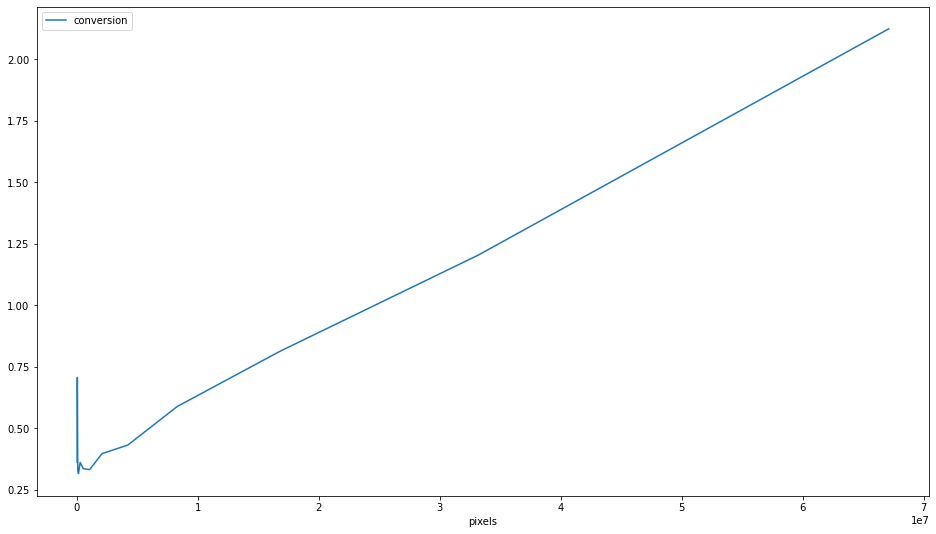

In [16]:
data.plot(x="pixels",y="conversion",figsize=(16,9)) 